# 1) Examine the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("melb_data.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# 2) Variable Analysis

In [5]:
def categorik(columns):
    fig, ax = plt.subplots(1, 2, figsize = (15,5))
    sns.stripplot(x = data[columns], y = data["Price"] ,ax = ax[0])
    sns.countplot(x = data[columns], order = data[columns].value_counts().index, ax = ax[1])
    plt.show()

In [6]:
def numeric(columns):
    fig, ax = plt.subplots(1, 2, figsize = (15,5))
    sns.scatterplot(x = data[columns], y = data["Price"], ax = ax[0])
    sns.distplot(x = data[columns], kde = False, ax = ax[1])
    plt.show()

### Rooms

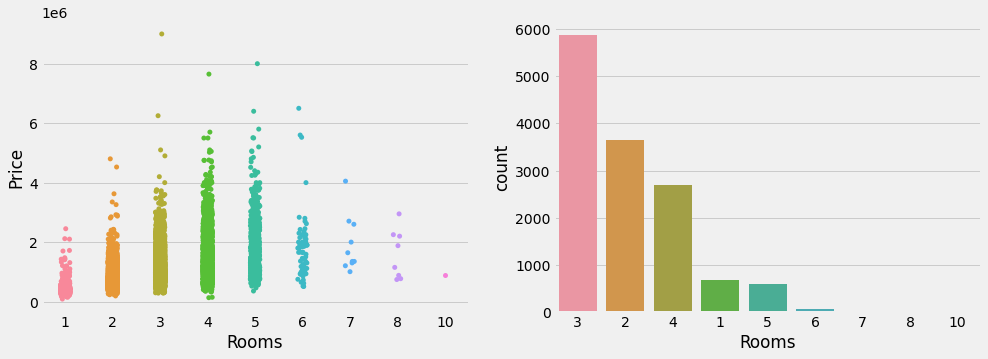

In [7]:
categorik("Rooms")

### Type

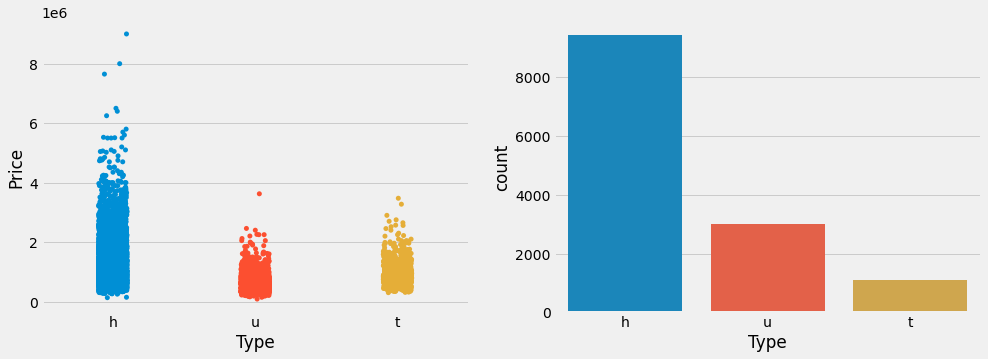

In [8]:
categorik("Type")

### Method

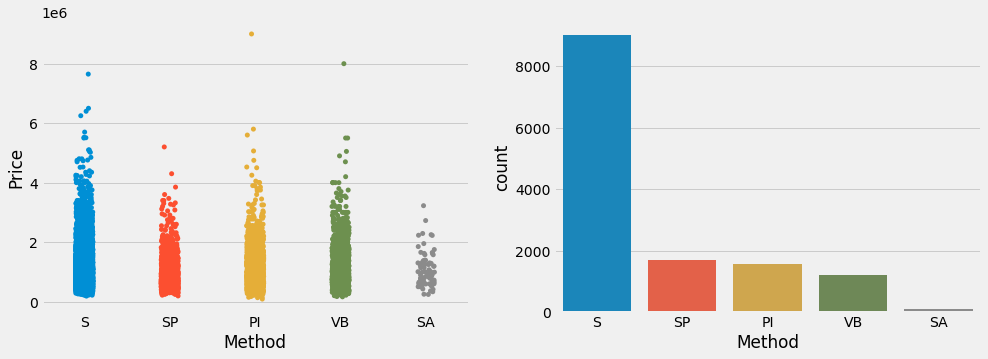

In [9]:
categorik("Method")

### Distance

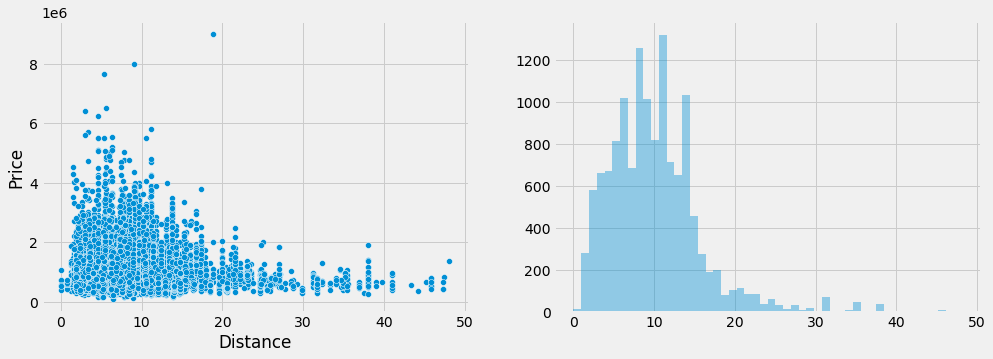

In [10]:
numeric("Distance")

### Bedroom2

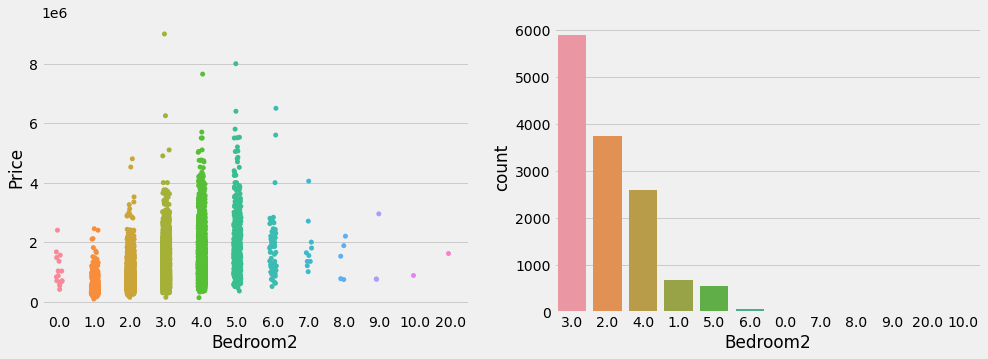

In [11]:
categorik("Bedroom2")

### Bathroom

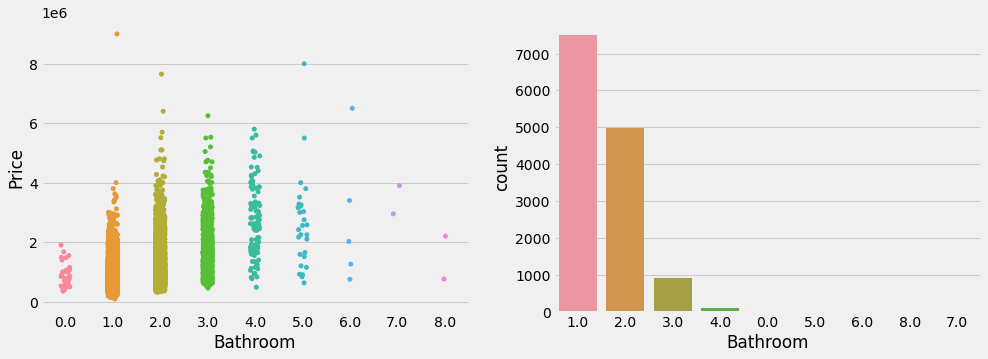

In [12]:
categorik("Bathroom")

### Car

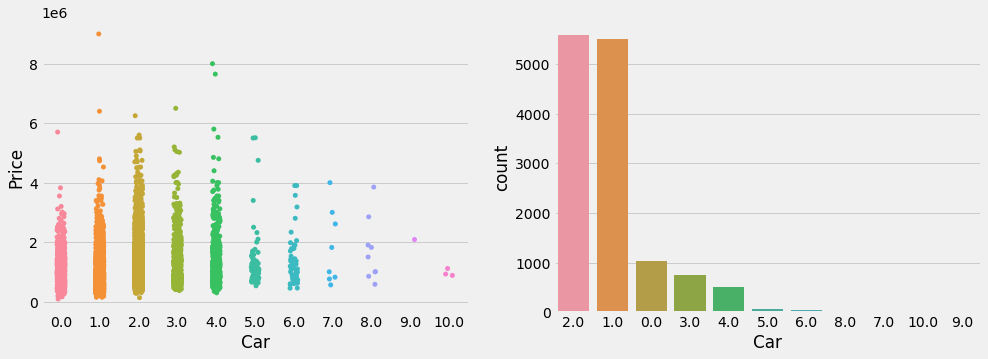

In [13]:
categorik("Car")

### Landsize

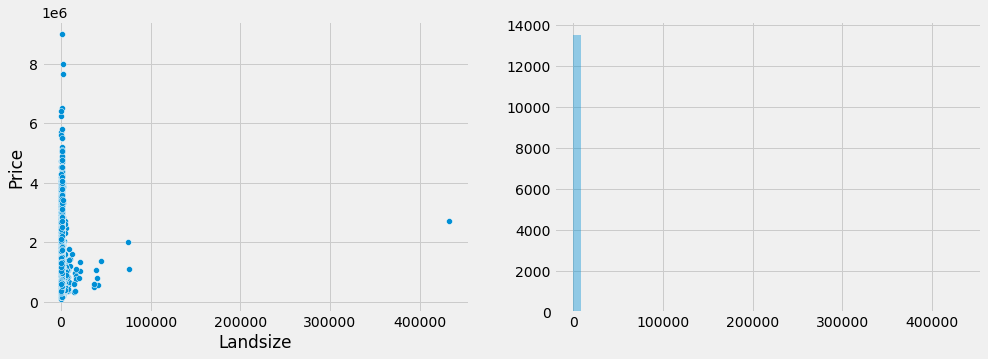

In [14]:
numeric("Landsize")

### BuildingArea

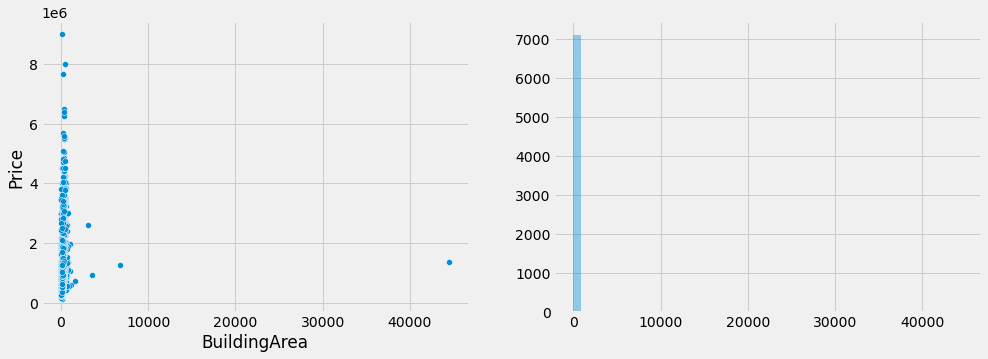

In [15]:
numeric("BuildingArea")

### YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

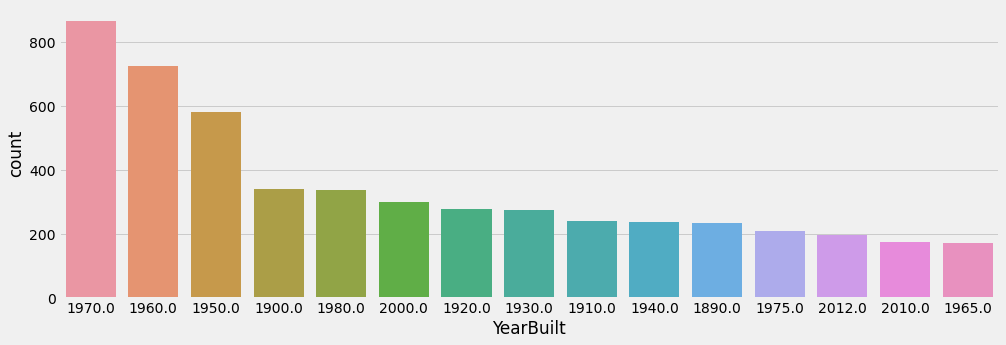

In [16]:
a = data["YearBuilt"].value_counts().head(15)
plt.figure(figsize = (15,5))
sns.countplot(x = data["YearBuilt"], order = a.index)

<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

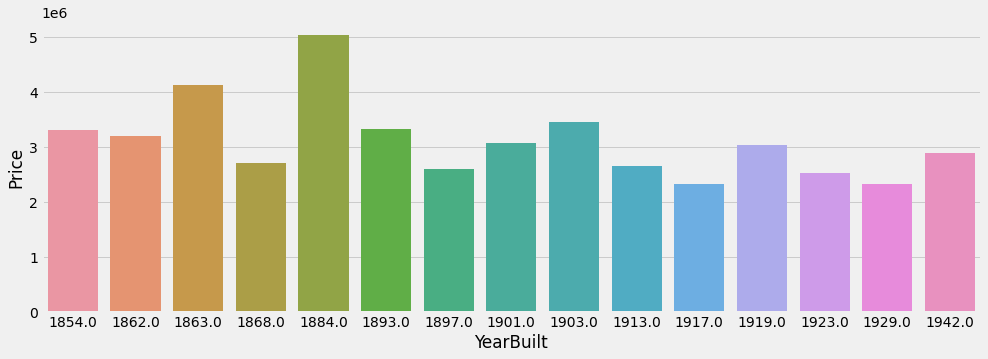

In [17]:
a = data.groupby(["YearBuilt"]).mean("Price").sort_values(["Price"], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(x = a["Price"].index, y = a["Price"])

### Lattitude

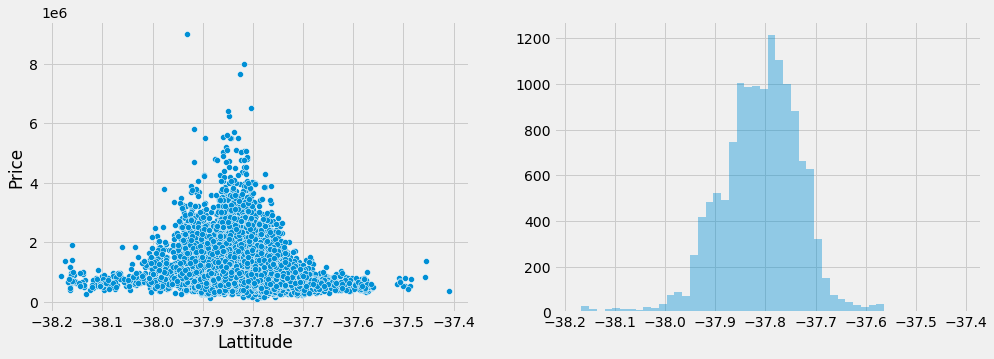

In [18]:
numeric("Lattitude")

### Longtitude

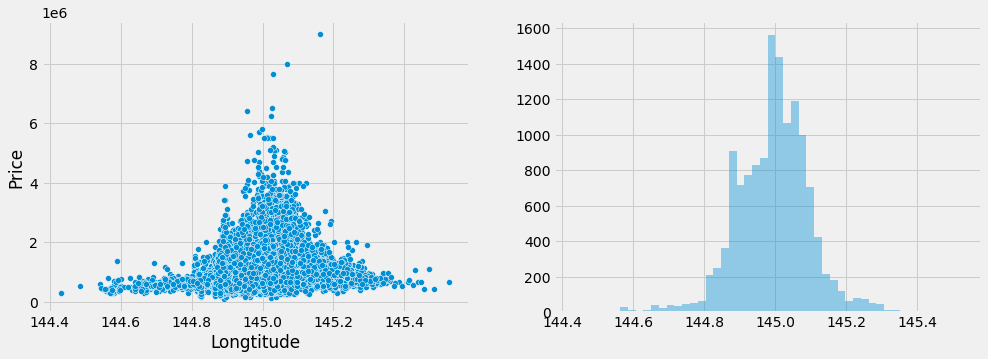

In [19]:
numeric("Longtitude")

### Regionname

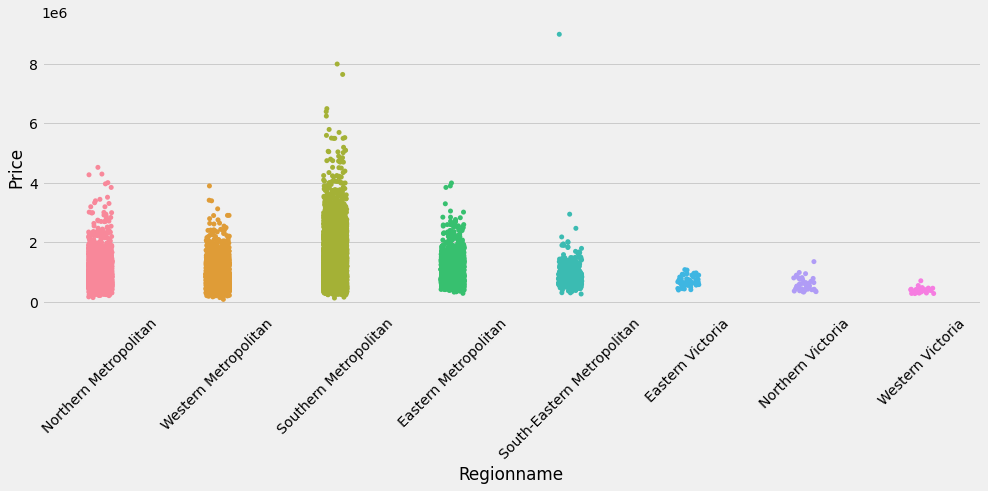

In [20]:
plt.figure(figsize = (15,5))
sns.stripplot(x = data["Regionname"], y = data["Price"])
plt.xticks(rotation = 45)
plt.show()

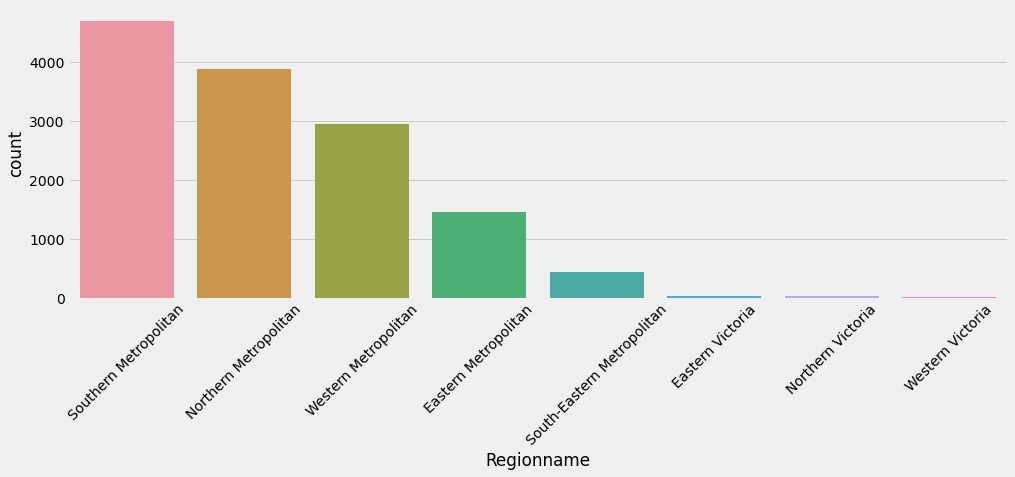

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(x = data["Regionname"], order = data["Regionname"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

### Propertycount

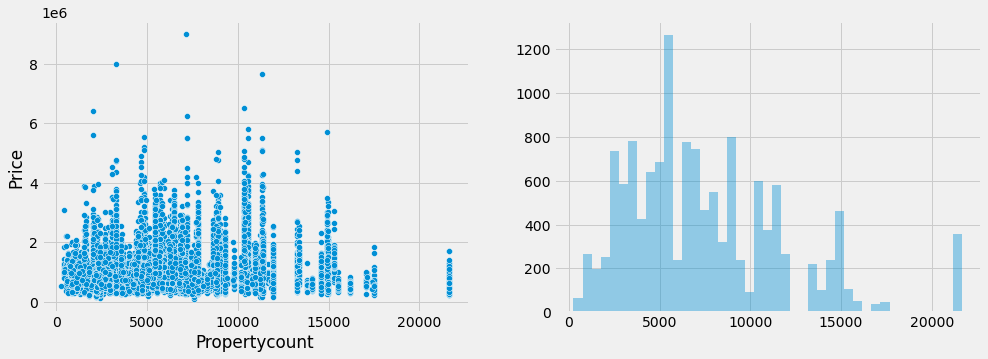

In [22]:
numeric("Propertycount")

# 3) Missing Value

In [23]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### BuildingArea

In [24]:
data.groupby(["Type"])["BuildingArea"].mean()

Type
h    176.866248
t    140.046323
u     80.737121
Name: BuildingArea, dtype: float64

In [25]:
liste = list(data[data["BuildingArea"].isnull()].index)

In [26]:
for i in liste:
    if data["Type"].iloc[i] == "h" :
        data["BuildingArea"][i] = 177
    elif data["Type"].iloc[i] == "t":
        data["BuildingArea"][i] = 140
    else:
        data["BuildingArea"][i] = 81

### Car, YearBuilt, CouncilArea

In [27]:
list_ = ["Car", "YearBuilt", "CouncilArea"]

In [28]:
for i in list_:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [29]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# 4) Outlier Detection

In [30]:
from collections import Counter
def outliers(data,columns):
    aykiri_indexler=[]
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 -Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
        aykiri_gozlemler = data[i][filtre]
        aykiri_index = aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler) #benzersiz degerleri bulup bunları dict çevirir
    ortak_indexler = [i for i,v in aykiri_indexler.items() if v>2] #aynı anda ikiden fazla outlier varsa bir satır için bunu al
    
    return ortak_indexler

In [31]:
x = data.select_dtypes(["float64", "int64"])
delete_index = outliers(data,x.columns)
data = data.drop(delete_index,axis=0).reset_index(drop=True)

In [32]:
data.shape

(12879, 21)

# 5) Feature Engineering

In [33]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,177.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,177.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [34]:
drop_list = ["Suburb", "Address", "SellerG", "Date", "Postcode", "CouncilArea", "YearBuilt"]

In [35]:
data.drop(["Suburb", "Address", "SellerG", "Date", "Postcode", "CouncilArea"], axis = 1, inplace = True)

In [36]:
data.head()

,Rooms,Type,Price,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,2.0,1.0,1.0,202.0,177.0,1970.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3.0,2.0,1.0,94.0,177.0,1970.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12879 entries, 0 to 12878
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          12879 non-null  int64  
 1   Type           12879 non-null  object 
 2   Price          12879 non-null  float64
 3   Method         12879 non-null  object 
 4   Distance       12879 non-null  float64
 5   Bedroom2       12879 non-null  float64
 6   Bathroom       12879 non-null  float64
 7   Car            12879 non-null  float64
 8   Landsize       12879 non-null  float64
 9   BuildingArea   12879 non-null  float64
 10  YearBuilt      12879 non-null  float64
 11  Lattitude      12879 non-null  float64
 12  Longtitude     12879 non-null  float64
 13  Regionname     12879 non-null  object 
 14  Propertycount  12879 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.5+ MB


In [38]:
dummies = ["Rooms", "Type", "Method", "Bedroom2", "Bathroom", "Car", "Regionname"]

In [39]:
for i in dummies:
    data[i] = data[i].astype(str)

In [40]:
data = pd.get_dummies(data)

In [41]:
data.columns

Index(['Price', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Longtitude', 'Propertycount', 'Rooms_1', 'Rooms_2',
       'Rooms_3', 'Rooms_4', 'Rooms_5', 'Rooms_6', 'Rooms_7', 'Rooms_8',
       'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Bedroom2_0.0', 'Bedroom2_1.0',
       'Bedroom2_2.0', 'Bedroom2_20.0', 'Bedroom2_3.0', 'Bedroom2_4.0',
       'Bedroom2_5.0', 'Bedroom2_6.0', 'Bedroom2_7.0', 'Bedroom2_8.0',
       'Bedroom2_9.0', 'Bathroom_0.0', 'Bathroom_1.0', 'Bathroom_2.0',
       'Bathroom_3.0', 'Bathroom_4.0', 'Bathroom_5.0', 'Bathroom_6.0',
       'Car_0.0', 'Car_1.0', 'Car_10.0', 'Car_2.0', 'Car_3.0', 'Car_4.0',
       'Car_5.0', 'Car_6.0', 'Car_7.0', 'Car_8.0', 'Car_9.0',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern 

# 6) ML Models

In [58]:
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [43]:
x = data.drop(["Price"], axis = 1)
y = data.Price.values.reshape(-1,1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Linear Regression

In [46]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
y_head = model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_head)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 8.644430995568935e+31


### Ridge Regression

In [47]:
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas}]
clf = GridSearchCV(ridge, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
model = clf.fit(x_train, y_train)
est_ridge = model.best_estimator_
y_head = model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_head)
print("Ridge Regression :", mse_ridge)

Ridge Regression : 116163861769.40564


### Lasso Regression

In [52]:
lasso = Lasso(random_state = 42, max_iter = 1000)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas}]
clf = GridSearchCV(lasso, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
model = clf.fit(x_train, y_train)
est_lasso = model.best_estimator_
y_head = model.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_head)
print("Lasso Regression: ", mse_lasso)

Lasso Regression:  116145269210.61893


### ElasticNet

In [54]:
elastic = ElasticNet(random_state = 42, max_iter = 100)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas,
              "l1_ratio":np.arange(0.0,1.0,0.05)}]
clf = GridSearchCV(elastic, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
model = clf.fit(x_train, y_train)
est_elastic = model.best_estimator_
y_head = model.predict(x_test)
mse_elastic = mean_squared_error(y_test, y_head)
print("ElasticNet MSE:", mse_elastic)

ElasticNet MSE: 115843009166.27094


### XGBoost

In [55]:
parametersGrid = {'nthread':[4],
                 "objective":["reg:linear"],
                 "learning_rate":[.03,0.05,.07],
                 "max_depth":[5,6,7],
                 "min_child_weight":[4],
                 "silent":[1],
                 "subsample":[0.7],
                 "colsample_bytree":[0.7],
                 "n_estimators":[500,1000]}
xgb_ = xgb.XGBRegressor()
clf = GridSearchCV(xgb_, parametersGrid, cv=5, scoring = "neg_mean_squared_error",
                  refit = True, n_jobs = 5)
model  = clf.fit(x_train,y_train)
est_xgb = model.best_estimator_
y_head = model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_head)
print("XGBoost MSE: ", mse_xgb)

XGBoost MSE:  56100687315.61748
